In [18]:
import requests
import bs4
import pandas as pd

In [19]:
url = 'https://www.adanirealty.com/contact-us'

In [20]:
result = requests.get(url)

In [21]:
result.text

'\r\n<!doctype html>\r\n<html lang="en">\r\n<head>\r\n    <meta charset="utf-8">\r\n\t<meta name="facebook-domain-verification" content="670xoeejaq6tegg46iuu850v7z9z4o" />\r\n    <meta http-equiv="x-ua-compatible" content="ie=edge">\r\n    <meta http-equiv="Content-type" content="text/html; charset=utf-8">\r\n    <meta name="viewport" content="width=device-width, initial-scale=1, shrink-to-fit=no">\r\n    <meta name="robots" content="index, follow">\r\n\r\n\r\n\r\n\r\n\r\n        <title>One of the leading Real Estate Companies with Residential, Commercial, and Social club projects across Ahmedabad, Mumbai, Pune, and Gurugram - Contact Us</title>\r\n    <meta name="keywords" content="adani realty, adani realty builders, adani realty builders head office, contact adani realty, enquire adani realty" />\r\n    <meta name="description" content="Check upcoming and newly launched residential and commercial projects by Adani Realty in Ahmedabad, Mumbai, Pune, and Gurugram by one of the best re

In [22]:
soup = bs4.BeautifulSoup(result.text,'lxml')

In [23]:
soup

<!DOCTYPE html>
<html lang="en">
<head>
<meta charset="utf-8"/>
<meta content="670xoeejaq6tegg46iuu850v7z9z4o" name="facebook-domain-verification"/>
<meta content="ie=edge" http-equiv="x-ua-compatible"/>
<meta content="text/html; charset=utf-8" http-equiv="Content-type"/>
<meta content="width=device-width, initial-scale=1, shrink-to-fit=no" name="viewport"/>
<meta content="index, follow" name="robots"/>
<title>One of the leading Real Estate Companies with Residential, Commercial, and Social club projects across Ahmedabad, Mumbai, Pune, and Gurugram - Contact Us</title>
<meta content="adani realty, adani realty builders, adani realty builders head office, contact adani realty, enquire adani realty" name="keywords"/>
<meta content="Check upcoming and newly launched residential and commercial projects by Adani Realty in Ahmedabad, Mumbai, Pune, and Gurugram by one of the best real estate companies. Enquire now to book a site visit." name="description"/>
<meta content="NOFOLLOW" name="robo

In [24]:
mainaddresslocation = soup.find_all('div', class_ = 'col-10')

In [25]:
mainaddresslocation

[<div class="col-10">
 <h4>Ahmedabad Office</h4>
 <p>CBD, Shantigram, Near Vaishno Devi Circle, SG Highway, Ahmedabad, Gujarat - 382421 </p>
 <hr/>
 </div>,
 <div class="col-10">
 <h4>Dubai, UAE Contact</h4>
 <p>atharv.parekh@adani.in<br/>+971-544556908</p>
 <hr/>
 </div>,
 <div class="col-10">
 <h4>Gurgaon Office</h4>
 <p>Adani House, Plot no. 83,</p>
 <p>Institutional Area, Sector 32, <br/>
 Gurugram- 122001, NCR India</p>
 <hr/>
 </div>,
 <div class="col-10">
 <h4>Mumbai Office</h4>
 <p>601, 6th Floor, Hallmark business Plaza, Opp. Guru nanak Hospital, Bandra East, Mumbai, Maharashtra - 400051 </p>
 <hr/>
 </div>,
 <div class="col-10">
 <h4>Pune Office</h4>
 <p>5th Floor, Arthavishwa Building, Off North Main Road, Lane No. 5, Koregaon Park, Pune- 411 001</p>
 <hr/>
 </div>]

In [26]:
datalist = []
for i in mainaddresslocation:
    p = i.find('p')
    datalist.append(p.string)

In [27]:
datalist

['CBD, Shantigram, Near Vaishno Devi Circle, SG Highway, Ahmedabad, Gujarat - 382421 ',
 None,
 'Adani House, Plot no. 83,',
 '601, 6th Floor, Hallmark business Plaza, Opp. Guru nanak Hospital, Bandra East, Mumbai, Maharashtra - 400051 ',
 '5th Floor, Arthavishwa Building, Off North Main Road, Lane No. 5, Koregaon Park, Pune- 411 001']

In [28]:
df = pd.DataFrame({'Address':datalist})

In [29]:
df

,Address
0,"CBD, Shantigram, Near Vaishno Devi Circle, SG ..."
1,None
2,"Adani House, Plot no. 83,"
3,"601, 6th Floor, Hallmark business Plaza, Opp. ..."
4,"5th Floor, Arthavishwa Building, Off North Mai..."


In [ ]:
#  data mining cheptar

In [2]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster

In [3]:
df = pd.read_csv('Nutrient Composition Dataset.csv')

In [4]:
df.head()

,S.No,Protein,Fat,vitaminC,Fibre,Product
0,1,0.452369,1.170926,1.079271,1.702960,"Amaranth leaves, cooked, boiled, drained, with..."
1,2,2.321087,0.706856,0.350088,0.658249,Bacon and beef sticks
2,3,0.884554,1.186571,2.428544,1.984562,"Apples, frozen, unsweetened, unheated (Include..."
3,4,0.715501,0.577599,0.270925,0.369266,"Alcoholic beverage, beer, light, BUD LIGHT"
4,5,0.132610,0.544521,0.116884,0.557309,"Alcoholic beverage, daiquiri, canned"


In [5]:
df.iloc[:,1:5].describe()

,Protein,Fat,vitaminC,Fibre
count,1746.000000,1746.000000,1746.000000,1746.000000
mean,0.922470,0.900091,0.900146,0.900830
std,0.627128,0.634617,0.623847,0.626875
min,0.000128,0.000267,0.000029,0.002579
25%,0.435853,0.394784,0.419103,0.389124
50%,0.813025,0.804687,0.796290,0.820783
75%,1.295106,1.298988,1.280870,1.295732
max,4.016890,3.979364,4.013322,3.570331


In [6]:
data = df.iloc[:,1:5]

In [7]:
data

,Protein,Fat,vitaminC,Fibre
0,0.452369,1.170926,1.079271,1.702960
1,2.321087,0.706856,0.350088,0.658249
2,0.884554,1.186571,2.428544,1.984562
3,0.715501,0.577599,0.270925,0.369266
4,0.132610,0.544521,0.116884,0.557309
...,...,...,...,...
1741,1.188371,1.963861,1.144457,1.438795
1742,2.325762,1.970995,1.352002,0.051109
1743,0.597130,0.727934,1.031587,0.255496
1744,0.748026,1.722406,1.319929,0.920391


In [8]:
ward_link = linkage(data, method='ward')

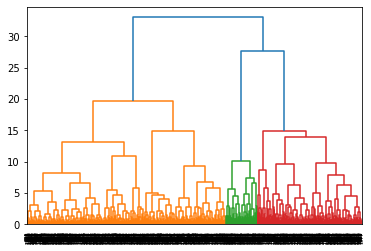

In [9]:
dend = dendrogram(ward_link)

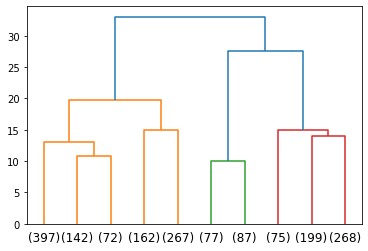

In [10]:
dend = dendrogram(ward_link,truncate_mode='lastp',p=10)

In [11]:
# method 1
t=3
max_cluster = fcluster(ward_link,t,criterion='maxclust')
max_cluster

array([1, 1, 2, ..., 1, 1, 3], dtype=int32)

In [12]:
# method 2
t=23
distance_cluster = fcluster(ward_link,t,criterion='distance')
distance_cluster

array([1, 1, 2, ..., 1, 1, 3], dtype=int32)

In [13]:
df['max_clusters'] = max_cluster

In [14]:
df['distance_cluster'] = distance_cluster

In [15]:
df.head()

,S.No,Protein,Fat,vitaminC,Fibre,Product,max_clusters,distance_cluster
0,1,0.452369,1.170926,1.079271,1.702960,"Amaranth leaves, cooked, boiled, drained, with...",1,1
1,2,2.321087,0.706856,0.350088,0.658249,Bacon and beef sticks,1,1
2,3,0.884554,1.186571,2.428544,1.984562,"Apples, frozen, unsweetened, unheated (Include...",2,2
3,4,0.715501,0.577599,0.270925,0.369266,"Alcoholic beverage, beer, light, BUD LIGHT",1,1
4,5,0.132610,0.544521,0.116884,0.557309,"Alcoholic beverage, daiquiri, canned",1,1


In [16]:
df.to_csv('hc.csv')

In [17]:
# k-means clusters 

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt
%matplotlib inline

In [31]:
data_df = pd.read_csv("Cust_Spend_Data_New.csv")

In [32]:
data_df.head(10)

,Cust_ID,Name,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
0,1,Abraham,1123,28,1,16,14
1,2,Adela,9818,13,5,2,5
2,3,Adelina,9824,10,10,2,2
3,4,Adrian,3097,23,2,8,9
4,5,Adrianna,817,28,1,17,17
5,6,Aide,3039,21,1,8,12
6,7,Alex,4676,22,3,8,13
7,8,Alexandria,7869,14,6,3,3
8,9,Alline,5585,21,2,10,12
9,10,Allyn,4589,23,2,8,9


In [33]:
data_df.shape

(829, 7)

In [34]:
data_df.dtypes

Cust_ID             int64
Name               object
Avg_Mthly_Spend     int64
No_Of_Visits        int64
Apparel_Items       int64
FnV_Items           int64
Staples_Items       int64
dtype: object

In [35]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 829 entries, 0 to 828
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Cust_ID          829 non-null    int64 
 1   Name             829 non-null    object
 2   Avg_Mthly_Spend  829 non-null    int64 
 3   No_Of_Visits     829 non-null    int64 
 4   Apparel_Items    829 non-null    int64 
 5   FnV_Items        829 non-null    int64 
 6   Staples_Items    829 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 45.5+ KB


In [36]:
data_df.describe()

,Cust_ID,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
count,829.000000,829.000000,829.000000,829.000000,829.000000,829.000000
mean,415.000000,4801.276236,17.856454,3.961399,7.623643,8.338963
std,239.455981,2056.494189,4.367192,2.056204,3.665773,4.250284
min,1.000000,549.000000,2.000000,0.000000,1.000000,0.000000
25%,208.000000,4156.000000,15.000000,3.000000,6.000000,5.000000
50%,415.000000,4516.000000,18.000000,4.000000,7.000000,8.000000
75%,622.000000,4910.000000,20.000000,5.000000,8.000000,10.000000
max,829.000000,10000.000000,29.000000,10.000000,19.000000,20.000000


In [37]:
data_df.duplicated().sum()

0

In [38]:
cust_df = data_df.drop(['Name','Cust_ID'], axis=1)

In [39]:
cust_df

,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
0,1123,28,1,16,14
1,9818,13,5,2,5
2,9824,10,10,2,2
3,3097,23,2,8,9
4,817,28,1,17,17
...,...,...,...,...,...
824,4639,17,4,7,10
825,4522,19,3,8,8
826,4499,15,4,8,9
827,4069,20,4,7,10


In [40]:
from sklearn.preprocessing import StandardScaler

In [41]:
X = StandardScaler()

In [42]:
scaled_df = X.fit_transform(cust_df)

In [49]:
scaled_df

array([[-1.7896947 ,  2.32407237, -1.44109551,  2.28639713,  1.33272373],
       [ 2.44092704, -1.1127025 ,  0.50541069, -1.53502065, -0.78605994],
       [ 2.44384639, -1.80005748,  2.93854344, -1.53502065, -1.49232116],
       ...,
       [-0.14707492, -0.65446585,  0.01878414,  0.10272982,  0.15562169],
       [-0.35629486,  0.49112577,  0.01878414, -0.17022859,  0.3910421 ],
       [-0.03468002,  0.03288912,  0.50541069,  0.10272982,  0.15562169]])

In [50]:
k_means = KMeans(n_clusters = 2)

In [52]:
k_means.fit(scaled_df)

KMeans(n_clusters=2)

In [53]:
k_means.labels_

array([1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,

In [54]:
k_means.inertia_

2225.8180780994685

In [58]:
k_means = KMeans(n_clusters = 3)
k_means.fit(scaled_df)
k_means.inertia_

1074.382380298951

In [59]:
k_means = KMeans(n_clusters = 4)
k_means.fit(scaled_df)
k_means.inertia_

909.4453294086204

In [61]:
k_means = KMeans(n_clusters = 1)
k_means.fit(scaled_df)
k_means.inertia_

4145.0

In [62]:
k_means = KMeans(n_clusters = 5)
k_means.fit(scaled_df)
k_means.inertia_

784.5624359391802

In [63]:
k_means = KMeans(n_clusters = 6)
k_means.fit(scaled_df)
k_means.inertia_

715.3565646208849

In [64]:
wss =[]

In [65]:
for i in range(1,11):
    KM = KMeans(n_clusters=i)
    KM.fit(scaled_df)
    wss.append(KM.inertia_)

In [66]:
wss

[4145.0,
 2225.8180780994685,
 1074.382380298951,
 909.4453294086204,
 784.5624359391802,
 697.7964308882454,
 628.7789519854748,
 580.9783026797722,
 539.7800568124054,
 508.62088308880595]

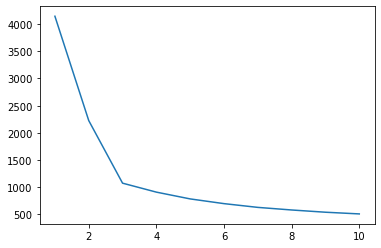

In [67]:
plt.plot(range(1,11), wss)

In [68]:
k_means = KMeans(n_clusters = 3)
k_means.fit(scaled_df)
labels = k_means.labels_

In [69]:
data_df["Clus_kmeans"] = labels
data_df.head(5)

,Cust_ID,Name,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items,Clus_kmeans
0,1,Abraham,1123,28,1,16,14,0
1,2,Adela,9818,13,5,2,5,1
2,3,Adelina,9824,10,10,2,2,1
3,4,Adrian,3097,23,2,8,9,2
4,5,Adrianna,817,28,1,17,17,0


In [70]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [71]:
silhouette_score(scaled_df,labels)

0.5863370901372584

In [72]:
sil_width = silhouette_samples(scaled_df,labels)

In [73]:
data_df["sil_width"] = sil_width
data_df.head(5)

,Cust_ID,Name,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items,Clus_kmeans,sil_width
0,1,Abraham,1123,28,1,16,14,0,0.656055
1,2,Adela,9818,13,5,2,5,1,0.512424
2,3,Adelina,9824,10,10,2,2,1,0.582380
3,4,Adrian,3097,23,2,8,9,2,0.375197
4,5,Adrianna,817,28,1,17,17,0,0.703167


In [74]:
silhouette_samples(scaled_df,labels).min()

0.04131038567750352

In [75]:
data_df.to_csv('km.csv')

In [77]:
df_eng = pd.read_csv('Engg_College_Data.csv')

In [78]:
df_eng.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   SR_NO           26 non-null     int64 
 1   Engg_College    26 non-null     object
 2   Teaching        26 non-null     int64 
 3   Fees            26 non-null     int64 
 4   Placements      26 non-null     int64 
 5   Internship      26 non-null     int64 
 6   Infrastructure  26 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 1.5+ KB


In [79]:
df_eng.Engg_College.nunique()

26

In [80]:
df_eng.Engg_College.unique()

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
       'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'],
      dtype=object)

In [81]:
df_eng.describe()

,SR_NO,Teaching,Fees,Placements,Internship,Infrastructure
count,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000
mean,13.500000,2.807692,3.576923,2.884615,2.769231,3.384615
std,7.648529,1.132051,1.331858,1.531716,1.242826,1.298520
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,7.250000,2.000000,2.250000,1.250000,2.000000,3.000000
50%,13.500000,3.000000,4.000000,3.000000,2.000000,3.000000
75%,19.750000,3.000000,5.000000,4.000000,4.000000,4.750000
max,26.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [82]:
df_eng_data = df_eng.drop('SR_NO',axis=1)

In [83]:
df_eng_data

,Engg_College,Teaching,Fees,Placements,Internship,Infrastructure
0,A,5,2,5,5,3
1,B,4,2,5,5,3
2,C,4,5,5,4,5
3,D,5,4,5,4,4
4,E,2,5,2,2,5
5,F,3,4,3,3,4
6,G,1,3,1,1,2
7,H,4,4,5,5,5
8,I,4,4,4,4,4
9,J,3,4,3,4,5


In [85]:
data = df_eng_data.iloc[:,1:6]

In [86]:
link_method = linkage(data, method='average')

In [90]:
lable_list = np.array(df_eng_data.Engg_College)
lable_list

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
       'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'],
      dtype=object)

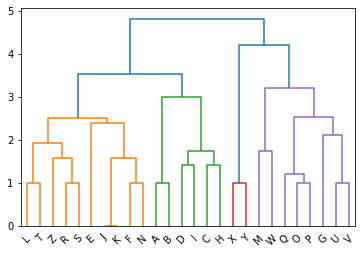

In [89]:
dend = dendrogram(link_method,labels=lable_list)

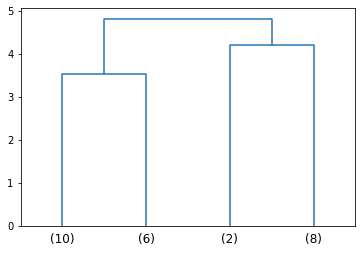

In [93]:
dend = dendrogram(link_method,labels=lable_list,truncate_mode='lastp',p=4)

In [94]:
from scipy.cluster.hierarchy import fcluster

In [97]:
clusters=fcluster(link_method,3,criterion='maxclust')

In [98]:
df_eng['cluster'] = clusters

In [99]:
df_eng

,SR_NO,Engg_College,Teaching,Fees,Placements,Internship,Infrastructure,cluster
0,1,A,5,2,5,5,3,1
1,2,B,4,2,5,5,3,1
2,3,C,4,5,5,4,5,1
3,4,D,5,4,5,4,4,1
4,5,E,2,5,2,2,5,1
5,6,F,3,4,3,3,4,1
6,7,G,1,3,1,1,2,3
7,8,H,4,4,5,5,5,1
8,9,I,4,4,4,4,4,1
9,10,J,3,4,3,4,5,1


In [100]:
df_eng.cluster.value_counts().sort_index()

1    16
2     2
3     8
Name: cluster, dtype: int64

In [101]:
from sklearn.cluster import AgglomerativeClustering

In [103]:
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='average')
Cluster_agglo=cluster.fit_predict(df_eng_data.iloc[:,1:6])
print(Cluster_agglo)

[0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 0 0 0 1 1 1 2 2 0]


In [104]:
df_eng["Agglo_CLusters"]=Cluster_agglo

In [106]:
df_eng.Agglo_CLusters.value_counts().sort_index()

0    16
1     8
2     2
Name: Agglo_CLusters, dtype: int64

In [108]:
agglo_data=df_eng.drop(["SR_NO","cluster"],axis=1).groupby('Agglo_CLusters').mean()
agglo_data['Freq']=df_eng.Agglo_CLusters.value_counts().sort_index()
agglo_data

,Teaching,Fees,Placements,Internship,Infrastructure,Freq
Agglo_CLusters,,,,,,
0,3.375,4.125,3.875,3.4375,3.875,16
1,2.125,3.125,1.375,1.7500,2.000,8
2,1.000,1.000,1.000,1.5000,5.000,2


In [109]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

In [110]:
df = pd.read_csv("leaf_data_uci_updated.csv")
df.head()

,Eccentricity,Aspect Ratio,Elongation,Solidity,Stochastic Convexity,Isoperimetric Factor,Maximal Indentation Depth,Lobedness,Average Intensity,Average Contrast,Smoothness,Third moment,Uniformity,Entropy
0,0.72694,1.4742,0.32396,0.98535,1.00000,0.83592,0.004657,0.003947,0.047790,0.127950,0.016108,0.005232,0.000275,1.17560
1,0.74173,1.5257,0.36116,0.98152,0.99825,0.79867,0.005242,0.005002,0.024160,0.090476,0.008119,0.002708,0.000075,0.69659
2,0.76722,1.5725,0.38998,0.97755,1.00000,0.80812,0.007457,0.010121,0.011897,0.057445,0.003289,0.000921,0.000038,0.44348
3,0.73797,1.4597,0.35376,0.97566,1.00000,0.81697,0.006877,0.008607,0.015950,0.065491,0.004271,0.001154,0.000066,0.58785
4,0.82301,1.7707,0.44462,0.97698,1.00000,0.75493,0.007428,0.010042,0.007938,0.045339,0.002051,0.000560,0.000023,0.34214


In [111]:
df.isna().sum()

Eccentricity                 0
Aspect Ratio                 0
Elongation                   0
Solidity                     0
Stochastic Convexity         0
Isoperimetric Factor         0
Maximal Indentation Depth    0
Lobedness                    0
Average Intensity            0
 Average Contrast            0
Smoothness                   0
 Third moment                0
Uniformity                   0
Entropy                      0
dtype: int64

In [112]:
print('The number of rows of the dataframe is',df.shape[0],'.')

print('The number of columns of the dataframe is',df.shape[1],'.')

The number of rows of the dataframe is 340 .
The number of columns of the dataframe is 14 .


In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Eccentricity               340 non-null    float64
 1   Aspect Ratio               340 non-null    float64
 2   Elongation                 340 non-null    float64
 3   Solidity                   340 non-null    float64
 4   Stochastic Convexity       340 non-null    float64
 5   Isoperimetric Factor       340 non-null    float64
 6   Maximal Indentation Depth  340 non-null    float64
 7   Lobedness                  340 non-null    float64
 8   Average Intensity          340 non-null    float64
 9    Average Contrast          340 non-null    float64
 10  Smoothness                 340 non-null    float64
 11   Third moment              340 non-null    float64
 12  Uniformity                 340 non-null    float64
 13  Entropy                    340 non-null    float64

In [114]:
df.describe()

,Eccentricity,Aspect Ratio,Elongation,Solidity,Stochastic Convexity,Isoperimetric Factor,Maximal Indentation Depth,Lobedness,Average Intensity,Average Contrast,Smoothness,Third moment,Uniformity,Entropy
count,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000
mean,0.719854,1.902051,0.513760,0.919101,0.975867,0.531234,0.034647,0.284499,0.051209,0.124535,0.017491,0.005678,0.000356,1.162630
std,0.208311,0.888783,0.195583,0.075247,0.032506,0.217532,0.031502,0.365318,0.035518,0.051860,0.013189,0.004495,0.000336,0.584854
min,0.117080,1.006600,0.107610,0.761323,0.915575,0.078376,0.002837,0.001464,0.005022,0.033415,0.001115,0.000229,0.000007,0.169400
25%,0.550622,1.211300,0.349623,0.890667,0.966230,0.346818,0.009521,0.016500,0.022843,0.083362,0.006901,0.002080,0.000102,0.718900
50%,0.763450,1.570750,0.501855,0.948130,0.992980,0.579160,0.023860,0.103615,0.042087,0.119375,0.014050,0.004447,0.000239,1.077450
75%,0.895097,2.343100,0.633373,0.976897,1.000000,0.700712,0.047834,0.416433,0.073046,0.163795,0.026127,0.008307,0.000516,1.554575
max,0.998710,4.040800,0.948340,0.993880,1.000000,0.858160,0.105303,1.016331,0.148349,0.280810,0.054967,0.017648,0.001137,2.708500


In [116]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler()
scaled_DF = X.fit_transform(df)
scaled_DF

array([[ 0.03406572, -0.48209894, -0.97186457, ..., -0.0993394 ,
        -0.24107626,  0.02220937],
       [ 0.10516996, -0.42406912, -0.78138363, ..., -0.66180812,
        -0.83677884, -0.79802302],
       [ 0.22771539, -0.37133521, -0.6338121 , ..., -1.06006173,
        -0.94670245, -1.23143573],
       ...,
       [-1.76156859, -0.97935258,  1.37079505, ...,  2.32734448,
         0.28950626,  0.90903502],
       [-0.57678648, -0.85563074,  1.03207692, ...,  0.11405691,
        -0.27155102, -0.01717466],
       [-1.19182128, -0.91490004,  1.74264253, ...,  1.73998658,
        -0.0808678 ,  0.68437481]])

In [117]:
from scipy.stats import zscore 
scaled_df = df.apply(zscore)
scaled_df.head()

,Eccentricity,Aspect Ratio,Elongation,Solidity,Stochastic Convexity,Isoperimetric Factor,Maximal Indentation Depth,Lobedness,Average Intensity,Average Contrast,Smoothness,Third moment,Uniformity,Entropy
0,0.034066,-0.482099,-0.971865,0.881718,0.743486,1.402718,-0.953401,-0.769100,-0.096417,0.065951,-0.105019,-0.099339,-0.241076,0.022209
1,0.105170,-0.424069,-0.781384,0.830744,0.689571,1.231226,-0.934782,-0.766208,-0.762703,-0.657718,-0.711617,-0.661808,-0.836779,-0.798023
2,0.227715,-0.371335,-0.633812,0.777907,0.743486,1.274732,-0.864365,-0.752173,-1.108478,-1.295588,-1.078407,-1.060062,-0.946702,-1.231436
3,0.087093,-0.498437,-0.819275,0.752752,0.743486,1.315476,-0.882820,-0.756324,-0.994197,-1.140210,-1.003871,-1.007984,-0.862100,-0.984224
4,0.495931,-0.148005,-0.354030,0.770320,0.743486,1.029856,-0.865297,-0.752390,-1.220111,-1.529370,-1.172391,-1.140460,-0.989599,-1.404965


In [118]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [119]:
HClust = linkage(scaled_DF, method = 'ward')

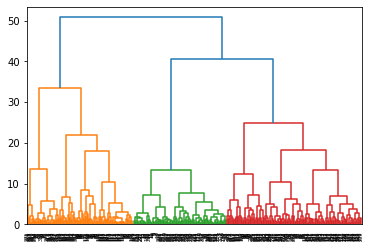

In [120]:
dend = dendrogram(HClust)

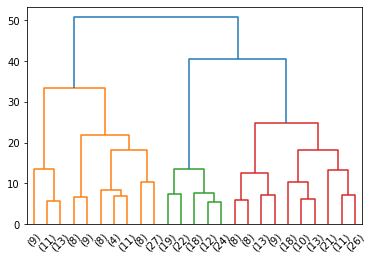

In [121]:
dend = dendrogram(HClust,
                 truncate_mode='lastp',
                 p = 25,# we are looking at the last 25 merges
                 )

In [122]:
from scipy.cluster.hierarchy import fcluster

In [123]:
#Method 1

clusters_1 = fcluster(HClust, 2, criterion='maxclust')
clusters_1

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1,
       1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [124]:
# Method 2

clusters_2 = fcluster(HClust, 60, criterion='distance')
clusters_2

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [125]:
np.array_equal(clusters_1,clusters_2)

False

In [127]:
df['H_clusters'] = clusters_1

In [128]:
df.head()

,Eccentricity,Aspect Ratio,Elongation,Solidity,Stochastic Convexity,Isoperimetric Factor,Maximal Indentation Depth,Lobedness,Average Intensity,Average Contrast,Smoothness,Third moment,Uniformity,Entropy,H_clusters
0,0.72694,1.4742,0.32396,0.98535,1.00000,0.83592,0.004657,0.003947,0.047790,0.127950,0.016108,0.005232,0.000275,1.17560,2
1,0.74173,1.5257,0.36116,0.98152,0.99825,0.79867,0.005242,0.005002,0.024160,0.090476,0.008119,0.002708,0.000075,0.69659,2
2,0.76722,1.5725,0.38998,0.97755,1.00000,0.80812,0.007457,0.010121,0.011897,0.057445,0.003289,0.000921,0.000038,0.44348,2
3,0.73797,1.4597,0.35376,0.97566,1.00000,0.81697,0.006877,0.008607,0.015950,0.065491,0.004271,0.001154,0.000066,0.58785,2
4,0.82301,1.7707,0.44462,0.97698,1.00000,0.75493,0.007428,0.010042,0.007938,0.045339,0.002051,0.000560,0.000023,0.34214,2


In [129]:
df.to_csv('H_Cluster.csv')

In [130]:
from sklearn.cluster import KMeans

In [131]:
k_means2 = KMeans(n_clusters = 2,random_state=0)
k_means2.fit(scaled_DF)
k_means2.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [132]:
k_means2.inertia_

3412.257118426089

In [133]:
k_means3 = KMeans(n_clusters = 3,random_state=0)
k_means3.fit(scaled_DF)
k_means3.inertia_

2389.230252700993

In [134]:
wss =[]

In [135]:
for i in range(1,15):
    KM = KMeans(n_clusters=i,random_state=1)
    KM.fit(scaled_DF)
    wss.append(KM.inertia_)

C:\Users\Rajat\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [136]:
wss

[4759.999999999998,
 3412.257118426089,
 2389.2847622446275,
 1895.2525135696264,
 1667.5714728895762,
 1444.8253269566708,
 1257.5489652813794,
 1144.9464521733332,
 1030.4046425010292,
 956.797172216412,
 885.4544493814683,
 809.939779718666,
 755.6842116625064,
 727.2484954203226]

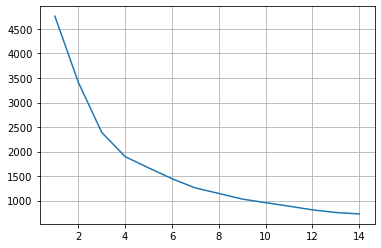

In [137]:
plt.plot(range(1,15), wss)
plt.grid()
plt.show()

In [138]:
k_means = KMeans(n_clusters = 2,random_state=0)
k_means.fit(scaled_DF)
labels = k_means.labels_
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [162]:
k_means4 = KMeans(n_clusters = 4,random_state=0)
k_means4.fit(scaled_DF)
k_means4.inertia_
labels_4 = k_means4.labels_
labels_4

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 1, 1, 1,
       1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 3, 1, 1, 0,
       0, 3, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 3, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 0, 0, 2,
       3, 1, 1, 1, 1, 3, 3, 1, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,

In [163]:
k_means4.inertia_

1895.2525135696264

In [140]:
DF_Kmeans = df.drop('H_clusters',axis=1)

In [141]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [142]:
silhouette_score(scaled_DF,labels)

0.33891969678800427

In [143]:
silhouette_samples(scaled_DF,labels).min()

-0.03425816681913697

In [144]:
silhouette_score(scaled_DF,labels_4)

0.3440124903541785

In [145]:
silhouette_samples(scaled_DF,labels_4).min()

-0.06482934126664346

In [147]:
df['Kmeans_clusters'] = labels

In [148]:
df.head()

,Eccentricity,Aspect Ratio,Elongation,Solidity,Stochastic Convexity,Isoperimetric Factor,Maximal Indentation Depth,Lobedness,Average Intensity,Average Contrast,Smoothness,Third moment,Uniformity,Entropy,H_clusters,Kmeans_clusters
0,0.72694,1.4742,0.32396,0.98535,1.00000,0.83592,0.004657,0.003947,0.047790,0.127950,0.016108,0.005232,0.000275,1.17560,2,1
1,0.74173,1.5257,0.36116,0.98152,0.99825,0.79867,0.005242,0.005002,0.024160,0.090476,0.008119,0.002708,0.000075,0.69659,2,1
2,0.76722,1.5725,0.38998,0.97755,1.00000,0.80812,0.007457,0.010121,0.011897,0.057445,0.003289,0.000921,0.000038,0.44348,2,1
3,0.73797,1.4597,0.35376,0.97566,1.00000,0.81697,0.006877,0.008607,0.015950,0.065491,0.004271,0.001154,0.000066,0.58785,2,1
4,0.82301,1.7707,0.44462,0.97698,1.00000,0.75493,0.007428,0.010042,0.007938,0.045339,0.002051,0.000560,0.000023,0.34214,2,1


In [149]:
from scipy.spatial import distance

In [150]:
p1 = (2, 3)
p2 = (4, 5)
d = distance.euclidean(p1, p2)
print("Euclidean distance: ",d)

Euclidean distance:  2.8284271247461903


In [151]:
dd = np.random.seed(7)

In [154]:
array=np.array(np.random.rand(20)).reshape(10,2)

In [155]:
array

array([[0.07630829, 0.77991879],
       [0.43840923, 0.72346518],
       [0.97798951, 0.53849587],
       [0.50112046, 0.07205113],
       [0.26843898, 0.4998825 ],
       [0.67923   , 0.80373904],
       [0.38094113, 0.06593635],
       [0.2881456 , 0.90959353],
       [0.21338535, 0.45212396],
       [0.93120602, 0.02489923]])

In [156]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler()
scaled_hh = X.fit_transform(array)
scaled_hh

array([[-1.39522475,  0.93201877],
       [-0.1296922 ,  0.7523863 ],
       [ 1.75612561,  0.16382359],
       [ 0.08948178, -1.32037931],
       [-0.72373342,  0.04095785],
       [ 0.71196956,  1.00781355],
       [-0.33054158, -1.33983624],
       [-0.65485934,  1.34463703],
       [-0.91614429, -0.11100733],
       [ 1.59261863, -1.47041422]])

In [157]:
k_means = KMeans(n_clusters = 2,random_state=0)
k_means.fit(scaled_hh)
labelsss = k_means.labels_
labelsss

array([0, 0, 1, 1, 0, 0, 1, 0, 0, 1])

In [158]:
silhouette_score(scaled_hh,labelsss)

0.4069015400992441

In [159]:
from scipy.spatial.distance import cityblock

In [160]:
A = [4, 4]
B = [9,9]

In [161]:
cityblock(A, B)

10